In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

In [2]:
image=cv2.imread('dark.jpg')

In [3]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [4]:
#先求一下图像的直方图
channel = [0]
mask = None
histSize = [256]
histRange = [0,256]
hist1 = cv2.calcHist([image],channel,mask,histSize,histRange)
M = image.shape[0]
N = image.shape[1]

In [5]:
def transformConstruction(image):#变换函数的构造器
    M = image.shape[0]
    N = image.shape[1]
    L = 256
    channel=[0]
    mask=None
    histSize=[L]
    histRange=[0,L]#注意这里的右边界是开，左边界是闭（python一贯特性）
    hist = cv2.calcHist([image],channel,mask,histSize,histRange)
    tran = []
    for i in range(256):
        tran = tran + [int((L-1)*np.sum(hist[0:i+1])/(M*N)+0.5)]
    tran = np.array(tran)
    def transform(x):
        y = int(x+0.5)#四舍五入
        try:
            return np.uint8(tran[y])#opencv只处理uint8的数据，所以必须转换。默认的是uint64,会造成严重错误
        except:print(y)
    return transform#构造了一个闭包，返回一个函数

In [6]:
#生成一个变换函数transform
transform = transformConstruction(image)

In [7]:
#使用转换函数对图像元素逐个转换
term = image.reshape((M*N,1))
result = np.array(list(map(transform,term)))
imageResult = result.reshape(M,N)

In [8]:
#统计一下均衡后图像的直方图
channel=[0]
mask=None
histSize=[256]
histRange=[2,256]
hist2 = cv2.calcHist([imageResult],channel,mask,histSize,histRange)

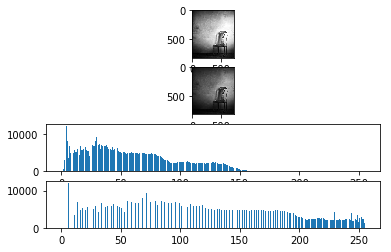

In [9]:
plt.subplot(411)
plt.imshow(imageResult,cmap='gray')
plt.subplot(412)
plt.imshow(image,cmap='gray')
plt.subplot(413)
hist1 = hist1.reshape(len(hist1))
plt.bar(range(len(hist1)), hist1)
plt.subplot(414)
hist2 = hist2.reshape(len(hist2))
plt.bar(range(len(hist2)), hist2)
plt.show()

画出的直方图结果和halcon的equ_histo_image函数的效果一模一样，非常成功
![avatar](/halconResult.jpg)

In [10]:
cv2.imwrite('./new.jpg', imageResult)#别忘了设置文件后缀哦
cv2.imwrite('./old.jpg',image)

True

In [11]:
hist1 = hist1.reshape(256)